In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as DT

NOAA = pd.read_csv("noaa_2017_rain.csv")

In [3]:
count_tsr = list()
m = 0
n=0
count_MPN = list()
p=0
timer= list()
bacteria_MPN = list()

In [4]:
def rain_alg(i):
    return NOAA.PCP01[i-7:i].sum()

for i in range (7,len(NOAA)):
    n = NOAA.MPN[i]
    p=i/24
    if rain_alg(i)>0.25:
        m = 1
    else:
        m = m+1
    count_tsr.append(m)
    timer.append(p)
    count_MPN.append(n)

In [28]:
MPN = count_MPN
TSR = count_tsr
c={"MPN" : MPN,
   "TSR" : TSR}
summary=pd.DataFrame(c)
summary.head()

,MPN,TSR
0,NaN,1
1,NaN,2
2,NaN,3
3,NaN,4
4,NaN,5


In [29]:
MPN_Filtered = summary[~pd.isnull(summary.MPN)]  
MPN_Filtered

,MPN,TSR
578,2755.0,57
747,41.0,158
915,5.0,326
1085,10.0,19
1255,86.0,54
1423,10.0,112
1592,20.0,56
1759,20.0,132
1929,30.0,302
2101,10.0,62


In [12]:
#MPN_Filtered
x = MPN_Filtered.TSR
y = MPN_Filtered.MPN


Text(0.5,1,'NOAA 2017 Prediction Curve')

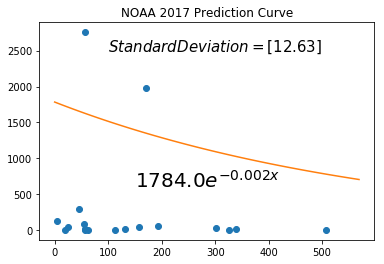

In [13]:
z,r,_,_,_ = np.polyfit(x, np.log(y), 1,w=np.sqrt(y),full=True)

xx = np.linspace(0,max(count_tsr),50)
yy = np.exp(z[1]+z[0]*xx)
rr = np.sqrt(r/50)
plt.plot(x,y,'o')
plt.plot(xx,yy,'-')
plt.text(150,600,r'${{{a}}}e^{{{{{b}}}x}}$'.format(a=np.around(np.exp(z[1])),decimals=3,b=np.around(z[0],decimals =3)),fontsize = 20)

plt.text(100,2500, r'$Standard Deviation={{{a}}}$'.format(a=np.around(rr,decimals=3)),fontsize=15)
plt.title("NOAA 2017 Prediction Curve")

array([3.99963832e+02, 1.94499788e-03])

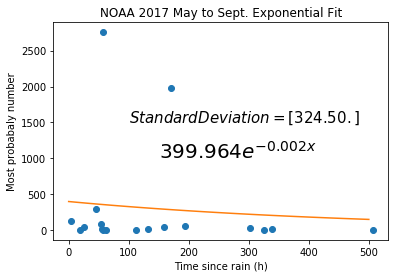

In [14]:
from matplotlib import pylab
from scipy.optimize import curve_fit

def exponenial_func(x, a, b):
    return a*np.exp(-b*x) #ae^(-bx)

popt, pcov = curve_fit(exponenial_func, x, y)

xx = np.linspace(0, 500, 50)
yy = exponenial_func(xx, *popt)
perr = np.sqrt(np.diag(pcov))

plt.plot(x,y,'o', xx, yy)
plt.text(150,1000,r'${{{a}}}e^{{{{{b}}}x}}$'.format(a=np.around((popt[0]),decimals=3),b=-np.around((popt[1]),decimals =3)),fontsize = 20)
#plt.text(150,4000,r'$1826.098e^{-0.051x}$',fontsize = 40)
plt.text(100,1500, r'$Standard Deviation={{{a}}}$'.format(a=np.around(perr,decimals=1)),fontsize=15)
pylab.title('NOAA 2017 May to Sept. Exponential Fit')
plt.xlabel('Time since rain (h)')
plt.ylabel('Most probabaly number')

popt

In [15]:
bacteria_MPN = 1784*np.exp(-0.002*np.array(count_tsr))

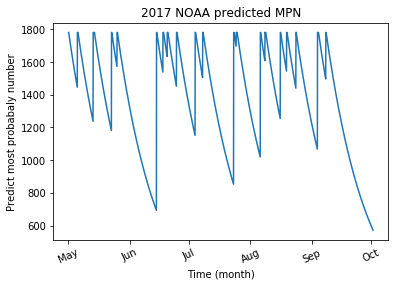

In [16]:
d0 = DT.datetime(1,1,1,0,0,0,0)
d1 = DT.datetime(2017,5,1,7,51,0,0)
dt = d1-d0

datenums = np.array(timer)

dates = mdates.num2date(datenums+1 + dt.days)
#print(dates)

#vals = np.random.randint(10, size=len(dates))
fig, ax = plt.subplots()
ax.plot(dates,bacteria_MPN , '-', markersize= 10)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=25)
#plt.ylim((0,450))
plt.xlabel('Time (month)')
plt.ylabel('Predict most probabaly number')
plt.title('2017 NOAA predicted MPN')
#ax.set_xticks(dates)
plt.show()


In [17]:
MPN_Filtered2 = summary[(summary.MPN<=1000)]  

In [18]:
x2 = MPN_Filtered2.TSR
y2 = MPN_Filtered2.MPN

Text(0,0.5,'Most probabaly number')

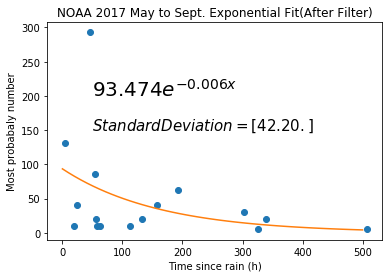

In [27]:
popt2, pcov2 = curve_fit(exponenial_func, x2, y2)

xx2 = np.linspace(0, 500, 50)
yy2 = exponenial_func(xx2, *popt2)
perr2 = np.sqrt(np.diag(pcov2))

plt.plot(x2,y2,'o', xx2, yy2)
plt.text(50,200,r'${{{a}}}e^{{{{{b}}}x}}$'.format(a=np.around((popt2[0]),decimals=3),b=-np.around((popt2[1]),decimals =3)),fontsize = 20)
#plt.text(15,4000,r'$1826.098e^{-0.051x}$',fontsize = 40)
plt.text(50,150, r'$Standard Deviation={{{a}}}$'.format(a=np.around(perr2,decimals=1)),fontsize=15)
pylab.title('NOAA 2017 May to Sept. Exponential Fit(After Filter)')
plt.xlabel('Time since rain (h)')
plt.ylabel('Most probabaly number')



In [25]:
bacteria_MPN2 = 93.474*np.exp(-0.006*np.array(count_tsr))

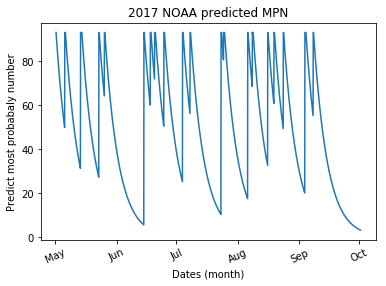

In [26]:
d0 = DT.datetime(1,1,1,0,0,0,0)
d1 = DT.datetime(2017,5,1,7,51,0,0)
dt = d1-d0

datenums = np.array(timer)

dates = mdates.num2date(datenums+1 + dt.days)
#print(dates)

#vals = np.random.randint(10, size=len(dates))
fig, ax = plt.subplots()
ax.plot(dates,bacteria_MPN2 , '-', markersize= 10)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=25)
#plt.ylim((0,750))
plt.xlabel('Dates (month)')
plt.ylabel('Predict most probabaly number')
pylab.title('2017 NOAA predicted MPN')
#ax.set_xticks(dates)
plt.show()